## A comparison of NYC's education levels and crime 

#### May 14th 2018
#### Principal Investigators: Wing Lau, Marvin Meng <br> E-mails: [wing.lau@stern.nyu.edu](wing.lau@stern.nyu.edu),  [marvin.meng@stern.nyu.edu](marvin.meng@stern.nyu.edu)

<img src="http://assets.nydailynews.com/polopoly_fs/1.1835186.1403128564!/img/httpImage/image.jpg_gen/derivatives/gallery_1200/new-york-city-subway-crime-1980s.jpg" alt="Drawing", style="width: 750px;" />

### Introduction

In this project, we were interested in examining how education levels and crime rates have evolved over time at a narrow geographic level (a commute zone) within the United States – more specifically across New York City boroughs. Essentially, the project aims to investigate the main question:

*What is the relationship between education levels and crime rates across NYC boroughs, and across time?*

Using Python and its extensive libraries, we processed and visualized the data to highlight insightgul trends about how education and crime are more closely linked. 

## Table of Contents

1. About the Data
    + 1.1    Data Sources 
2. Data Fetching, Cleaning, and Processing
    + 2.1    Python Libraries
    + 2.2    Obtaining Data
    + 2.3    Cleaning Data
    + 2.4    Merging Data
        + *2.4.1 Combining Crime Data into 1 Dataframe*
        + *2.4.2 Scraper *
    + 2.5    Cleaning Merged Data
3. Visualizing the Data
    + 3.1  Education
        + *3.1.1 Visualizing Graduating outcomes across time, by borough*
        + *3.1.2 Visualizing Graduating outcomes across time, by district*
    + 3.2  Crime
        + *3.2.1     Visualizing total Crime across time*
        + *3.2.2     Visualizing Crime by zipcode*
    + 3.3  Analyzing Data
4. Conclusion

# 1. About the Data

The data has been obtained from New York Police Department and the NYC Department of Education. 

NYPD Historical Crime Data compiles reported crime and offense data from 2000 - 2017, categorized by police precinct. The data is separated into the following subsets: 
1. Seven Major Felonies
2. Other Felony Crimes
3. Misdemeanors
4. Violations 

NYC Department of Education compiles graduation outcomes data from the Cohort of 2001-2013 (Class of 2005-2017). The cohort consists of all students who first entered ninth grade in a given school year (e.g., the Cohort of 2001 entered 9th grade in the 2001-2002 school year). Graduates are defined as those students earning either a Local or Regents diploma and exclude those earning either a special education (IEP) diploma or GED. 
We will use the datasets disaggregated by Borough and District. 

### 1.1 Data Sources

**Website:** New York Police Department, NYC Department of Education

**Historical Data Span:** 2005-2017

**Data Sources URLs:**

+ Graduation levels across boroughs and districts: http://schools.nyc.gov/Accountability/data/GraduationDropoutReports/default.htm
+ NYC crime rates http://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page

# 2. Data Fetching, Cleaning, and Processing

## 2.1 Importing necessary libraries.

In [344]:
from IPython.display import display, Image 
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import bs4 as bs

import os
import requests, io             
import zipfile as zf            
import shutil                   

import fiona 
import geopandas as gpd 
from shapely.geometry import Point, Polygon 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## 2.2 Obtaining Data

**Preparing the geopandas mapping data.**

In [345]:
cwd = os.getcwd()
nyc_map = gpd.read_file(cwd) #mapping data

**Importing Crime and Education Data.**

In [346]:
seven_major = pd.read_excel("seven-major-felony-offenses-by-precinct-2000-2017.xls", skip_footer=20, skiprows=2, usecols=[0,1, *range(7,20)])
nonseven_major = pd.read_excel("non-seven-major-felony-offenses-by-precinct-2000-2017.xls", skip_footer=33, skiprows=2,usecols=[0,1, *range(7,20)])
misdemeanors = pd.read_excel("misdemeanor-offenses-by-precinct-2000-2017.xls", skip_footer=41, skiprows=2,usecols=[0,1, *range(7,20)])
violations = pd.read_excel("violation-offenses-by-precinct-2000-2017.xls", skip_footer=19, skiprows=2,usecols=[0,1, *range(7,20)])
grad_rate = pd.read_excel("2017Graduation_Rates_Public_Borough.xlsx") #graduation rates by borough
grad_rate_district = pd.read_excel("2017-Graduation-Rates-Public-District.xlsx") #graduation rate by school district

## 2.3 Cleaning Imported Data

**Cleaning Education Data.**

In [347]:
grad_rate_district = grad_rate_district.groupby("District") #grouping by school district
grad_rate_district.groups;

**Cleaning Crime Data: Filling in NaN values under Precinct Column (PCT).**

In [348]:
count=0
for var in seven_major["PCT"]:
    while count < len(seven_major["PCT"]):
        seven_major["PCT"][count:count+8] = seven_major["PCT"][count]
        count += 8

count=0
for var in nonseven_major["PCT"]:
    while count < len(nonseven_major["PCT"]):
        nonseven_major["PCT"][count:count+9] = nonseven_major["PCT"][count]
        count += 9

count=0
for var in misdemeanors["PCT"]:
    while count < len(misdemeanors["PCT"]):
        misdemeanors["PCT"][count:count+18] = misdemeanors["PCT"][count]
        count += 18
        
count=0
for var in violations["PCT"]:
    while count < len(violations["PCT"]):
        violations["PCT"][count:count+3] = violations["PCT"][count]
        count += 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipy

**Adding a column to distinguish category of crime.**

In [349]:
violations["Crime Type"] = "Violation"
misdemeanors["Crime Type"] = "Misdemeanor"
seven_major["Crime Type"] = "Major Felony"
nonseven_major["Crime Type"] = "Non-Major Felony"

## 2.4 Merge
Now we can finally merge the two data sets, nyc_map and crime.

#### 2.4.1 Combining crime data into one dataframe.

In [350]:
crime = seven_major.append([nonseven_major, misdemeanors, violations], ignore_index=True)
crime = crime.sort_values(["PCT", "Crime Type"])
#crime = crime.set_index(["PCT", "Crime Type"])
crime.columns = [str(var) for var in crime.columns]


#### 2.4.2 Scraper
We need to merge the nyc_amp data with the crime data, but there are no matching columns.
To solve this we will scrape the nyc website to match the Police Precincts with Zip Codes.

In [351]:
#scraping nypd site for precinct zip codes
url = "http://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page"
sauce = requests.get(url).content
soup = bs.BeautifulSoup(sauce, 'lxml')

In [352]:
table = soup.table  #finds first table
table_all = soup.find_all('table') # find all tables

table_rows = table.find_all('tr')  #finds all <tr> from first table

p_numbers = []

for tr in table_rows:   # for each <tr> in first <table>, print text from <td>
    anchors = tr.find_all('a')  #finds all <td>
    row = [i for i in anchors]  #gets text from <td>
    row = str(row).split(sep="\"") 
    trow = row.pop().split(sep="<")
    trow = trow[0].split(sep=">")
    hrow = trow.pop()
    hrow = hrow.replace("P", "p")
    hrow = hrow.replace(" ", "-")
    p_numbers += [hrow] #taking precinct numbers


p_numbers = [var for var in p_numbers if var != "[]"] #removing empty lists
p_numbers;


In [353]:
p_zip = []
for var in p_numbers:
    url = "http://www1.nyc.gov/site/nypd/bureaus/patrol/precincts/" + var + ".page" #uses previous scraper data to find URL's we are actually interested in
    sauce = requests.get(url).content
    soup = bs.BeautifulSoup(sauce, 'lxml')
    para = (soup.find_all('p')[1]).text.split(sep=', ').pop()
    p_zip+=[para[0:5]] #list of zip codes

p_zip[7] = "10001"
p_zip[9] = "10019"
p_zip[12] = "10024"
p_zip[57] = "11693"

p_zip;

p_zip_codes = []
for var in p_zip:
    p_zip_codes += [var]*38

**Adding Zipcode column to crime data.**

In [354]:
crime["ZIPCODE"] = p_zip_codes

**Here is where we finally merge the nyc_map data with the crime data.**

In [355]:
nyc_crime = pd.merge(nyc_map, crime, on="ZIPCODE", how="outer", indicator = True)

#Remove extraneous columns
nyc_crime.columns = [str(var) for var in nyc_crime.columns]
nyc_crime = nyc_crime.drop(["BLDGZIP", "PO_NAME","STATE","COUNTY","URL","CTY_FIPS","ST_FIPS", "SHAPE_LEN","SHAPE_AREA", ], axis=1)
nyc_crime.set_index("ZIPCODE")



,POPULATION,AREA,geometry,PCT,CRIME,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Crime Type,_merge
ZIPCODE,,,,,,,,,,,,,,,,,,,,
11436,18681.0,2.269930e+07,"POLYGON ((1038098.251871482 188138.3800067157,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,MURDER & NON NEGL. MANSLAUGHTER ...,12.0,23.0,15.0,19.0,13.0,20.0,10.0,10.0,12.0,8.0,12.0,10.0,6.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,RAPE,20.0,21.0,17.0,19.0,15.0,23.0,23.0,19.0,24.0,22.0,21.0,22.0,24.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,ROBBERY,408.0,359.0,392.0,312.0,237.0,295.0,355.0,363.0,395.0,299.0,298.0,256.0,209.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,FELONY ASSAULT,351.0,300.0,332.0,241.0,220.0,301.0,355.0,342.0,392.0,388.0,353.0,370.0,296.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,BURGLARY,317.0,264.0,306.0,272.0,253.0,317.0,370.0,323.0,307.0,298.0,255.0,196.0,181.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,GRAND LARCENY,388.0,367.0,367.0,341.0,284.0,281.0,381.0,425.0,551.0,511.0,454.0,455.0,373.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,GRAND LARCENY OF MOTOR VEHICLE ...,153.0,165.0,173.0,143.0,142.0,129.0,105.0,119.0,111.0,138.0,102.0,84.0,64.0,Major Felony,both
11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",77.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1649.0,1499.0,1602.0,1347.0,1164.0,1366.0,1599.0,1601.0,1792.0,1664.0,1495.0,1393.0,1153.0,Major Felony,both


## 2.5 Cleaning Merged Data

**Creating new column variables.**
- Avg_Crime is the average crime occurances over 13 years. 
- Avg_Crime_Person is average crime over 13 years standardized by population. 
- ACP_Scaled just scales Crime per person to make the color differences more pronounced on the map.

In [356]:
#Add other columns
nyc_crime["Avg_Crime"] = (nyc_crime["2005"] + nyc_crime["2006"] + nyc_crime["2007"] + nyc_crime["2008"] + nyc_crime["2009"]+nyc_crime["2010"] + nyc_crime["2011"] + nyc_crime["2012"] + nyc_crime["2013"] + nyc_crime["2014"] + nyc_crime["2015"] + nyc_crime["2016"] + nyc_crime["2017"])/13
nyc_crime["Avg_Crime_Person"] = nyc_crime["Avg_Crime"]/nyc_crime["POPULATION"]
nyc_crime["ACP_Scaled"] = nyc_crime["Avg_Crime_Person"] * 10000000

**Adding a Borough Column to dataframe.**

In [357]:
borough = {'Brooklyn': ['11213', '11212', '11225', '11218', '11226', '11219', '11210', '11230', '11204', '11222', '11237','11206','11251','11201', '11205','11208', '11207','11217', '11238','11231','11215', '11232','11203', '11239', '11236', '11220','11234','11209','11228','11229', '11214','11223','11235','11224','11221'],
            'Bronx': ['10460', '10457', '10461','10465', '10453', '10471', '10470', '10466', '10467', '10463', '10475', '10464', '10469', '10468', '10458','10452', '10456', '10472', '10459', '10451', '10473', '10474', '10455', '10454'],
            'Manhattan': ['00083','10034', '10033', '10462', '10040','10032','10031', '10039','10030', '10027', '10037', '10024', '10026','10035', '10048', '10025','10029','10128', '10023', '10028','10021','10044','10018', '10020','10017', '10001', '10011', '10016','10010','10003','10014', '10002','10009', '10012','10013', '10007', '10038','10006','10005', '10004','10280','10055', '10019', '10111', '10153', '10154', '10152', '10115', '10022', '10065', '10075', '10069', '10281', '10282',  '10279', '10165', '10168',  '10105', '10118', '10176', '10170', '10112', '10122', '10107', '10103', '10174', '10166', '10169', '10167', '10177', '10172', '10171', '10270', '10104', '10271', '10110', '10175', '10151', '10173', '10178', '10121', '10123', '10106', '10158', '10041', '10120', '10278', '10155', '10043', '10081', '10096', '10097', '10196', '10275','10265', '10045', '10047', '10080', '10203', '10259', '10260', '10285', '10286', '11371', '11361', '10036','10162', '10119'],
            'Queens': ["11385",'11378','11436','11357', '11356', '11359', '11360', '11105','11363','11354','11102', '11370','11358', '11362','11369', '11103', '11106', '11368', '11377', '11355', '11101', '11364','11005', '11104', '11109','11367','11412',  '11411',   '11413', '11422', '11420', '11417',  '11430','11693', '11096',   '11691',  '11692', '10306', '11694',  '10308', '11697', '10312', '11372', '11004', '11040', '11426', '11365', '11001', '11375', '11427', '11374', '11366', '11423', '11428', '11432', '11379', '11429', '11435', '11415', '11418', '11433', '11451','11421', '11419', '11434','11216','11233','11211', '11373','11416','11414','11249'],
            'Staten Island': ['10301', '10303', '10302',  '10304', '10314','10305','10309', '10307','10310']
           } #dictionary mapping Borough to Zip Codes


borough_list = [] #list to contain boroughs from zip codes

key_list = list(borough.keys()) #list of boroughs
value_list = list(borough.values()) #list of zip codes


for var in nyc_crime["ZIPCODE"]: #each zip code in column
    for i in range(0,len(value_list)): #sets range
        if var in value_list[i]: #compares zip code to value_list
            borough_list += [key_list[i]]


nyc_crime["Borough"] = borough_list

### Separating Data

Here we will use the groupby() method to separate the data into crime, cross-sectioned by borough and year.

In [366]:
nyc_crime2 = pd.DataFrame(nyc_crime)
nyc_crime2 = nyc_crime.groupby("Borough") #creating a dummy variable

bronx_crime = pd.DataFrame(nyc_crime2.get_group("Bronx"))
manhattan_crime = pd.DataFrame(nyc_crime2.get_group("Manhattan"))
staten_island_crime = pd.DataFrame(nyc_crime2.get_group("Staten Island"))
brooklyn_crime = pd.DataFrame(nyc_crime2.get_group("Brooklyn"))
queens_crime = pd.DataFrame(nyc_crime2.get_group("Queens")) #separate dataframes for each borough

total_crime = pd.DataFrame({"Queens":(queens_crime).sum(),
                            "Brooklyn": brooklyn_crime.sum(),
                            "Manhattan": manhattan_crime.sum(),
                            "Staten Island": staten_island_crime.sum(),
                            "Bronx": bronx_crime.sum()
})

total_crime = total_crime.drop(["AREA","ZIPCODE","PCT","POPULATION","_merge","Avg_Crime", "Avg_Crime_Person", "ACP_Scaled","Borough","2017","2016","2015","2014"])
total_crime

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2005,287148,351514,340550,311080,34240
2006,286352,346276,333634,314774,37614
2007,298432,344016,342534,315874,35926
2008,293030,337212,338990,315440,38286
2009,295794,335048,329496,302406,35060
2010,291636,336738,326150,301530,35520
2011,279790,335030,314836,301086,34432
2012,273016,336538,322698,296990,33638
2013,261500,319790,318450,295098,35690


Similarly, we now separate education by borough and year.

In [359]:
grad_rate = grad_rate.groupby("Borough") #grouping by borough
bronx_edu = pd.DataFrame(grad_rate_gb.get_group("Bronx")).set_index("Cohort Year")
manhattan_edu = pd.DataFrame(grad_rate_gb.get_group("Manhattan")).set_index("Cohort Year")
staten_island_edu = pd.DataFrame(grad_rate_gb.get_group("Staten Island")).set_index("Cohort Year")
brooklyn_edu = pd.DataFrame(grad_rate_gb.get_group("Brooklyn")).set_index("Cohort Year")
queens_edu = pd.DataFrame(grad_rate_gb.get_group("Queens")).set_index("Cohort Year")
total_edu = pd.DataFrame({"Queens":queens_edu["% of cohort"],
                            "Brooklyn": brooklyn_edu["% of cohort"],
                            "Manhattan": manhattan_edu["% of cohort"],
                            "Staten Island": staten_island_edu["% of cohort"],
                            "Bronx": bronx_edu["% of cohort"]
})
total_edu = total_edu.drop([2001,2002,2003,2004])
total_edu

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Cohort Year,,,,,
2013,62.91332,70.68073,71.96335,74.84678,78.75188
2012,62.01040,69.18311,71.91213,73.20342,77.61883
2011,58.29948,66.98756,69.23177,70.51550,75.69738
2010,54.68409,63.80621,66.62219,66.52633,76.33019
2009,52.34668,60.98572,63.35399,63.93174,72.81532
2008,50.71478,60.14401,62.77248,63.58567,72.00605
2007,52.67404,59.50431,62.65588,64.96090,72.13808
2006,54.71468,58.79965,63.41983,63.73351,72.69172
2005,54.22734,56.43723,61.95796,60.80159,69.46188


# 3. Visualizing Data

## 3.1 Education Data
We will now plot our data, starting by plotting Percentage of Class Cohorts that Graduated over 12 years, separated by Borough.

#### 3.1.1 Graphing Percentage of Graduates over time by Borough

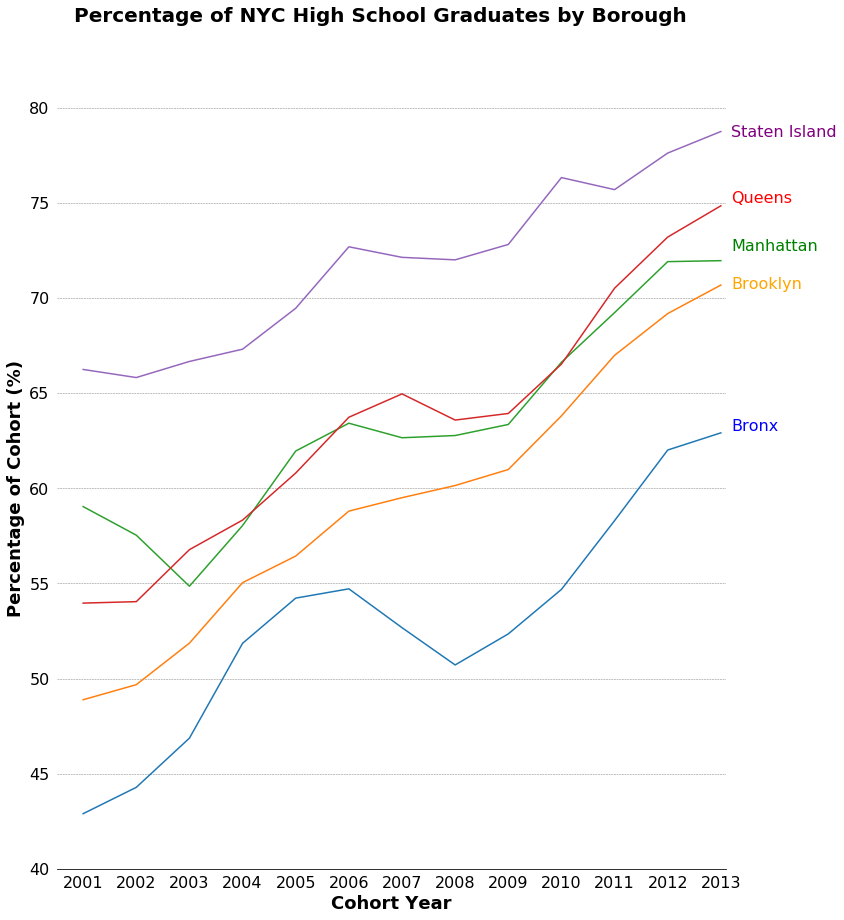

In [360]:
# Here we include a graph that maps the percentage of students enrolled 
# in "4 Year June" high school programs that graduated, with data 
# available for Cohort Years from 2001-2013 (Class of 2005-2017).

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,14))

# We plot the 5 boroughs of Cohort Year against % of Cohort who graduated.
ax.plot(grad_rate.get_group("Bronx")["Cohort Year"],grad_rate.get_group("Bronx")["% of cohort"])
ax.plot(grad_rate.get_group("Brooklyn")["Cohort Year"],grad_rate.get_group("Brooklyn")["% of cohort"])
ax.plot(grad_rate.get_group("Manhattan")["Cohort Year"],grad_rate.get_group("Manhattan")["% of cohort"])
ax.plot(grad_rate.get_group("Queens")["Cohort Year"],grad_rate.get_group("Queens")["% of cohort"])
ax.plot(grad_rate.get_group("Staten Island")["Cohort Year"],grad_rate.get_group("Staten Island")["% of cohort"])

# We remove the top, right and left frame lines. 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Limit the range of the plot to only where the data is.
ax.set_xlim(2000.5, 2013.1)
ax.set_ylim(40, 80)

#Set axis ticks, showing Cohort Year and % of cohorts.
plt.xticks(range(2001, 2014, 1), fontsize=16)
plt.yticks(range(40, 85, 5), fontsize=16)

#Insert y gridlines for easier reading of the graph. 
ax.grid(True, axis ='y', ls='--', lw=.5, c='k', alpha=.5)

ax.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

#Set x and y axis labels.
ax.set_ylabel("Percentage of Cohort (%)", fontsize = 18, fontweight="bold")
ax.set_xlabel("Cohort Year", fontsize = 18, fontweight="bold")

#Insert in-graph labels of the different boroughs. 
ax.text(2013.2, 78.5, "Staten Island", fontsize=16, color = "purple")
ax.text(2013.2, 75, "Queens", fontsize=16, color = "red")
ax.text(2013.2, 72.5, "Manhattan", fontsize=16, color = "green")
ax.text(2013.2, 70.5, "Brooklyn", fontsize=16, color = "orange")
ax.text(2013.2, 63, "Bronx", fontsize=16, color = "blue")

#Graph title
fig.suptitle('Percentage of NYC High School Graduates by Borough', fontsize=20, fontweight='bold', ha='center')

plt.show()

From this graph, we can see the relative standing of each borough with respect to graduation rates, With Staten Island being the highest and the Bronx being the lowest. Since it is measuring the percentage of cohort graduating, it is not affected by a population confounding variable (i.e. larger boroughs would have larger amounts of graduates).
This is interesting because the top three boroughs with the most education also have the lowest three amounts of crime.

#### 3.1.2 Graphing Graduation Rates over time by School District

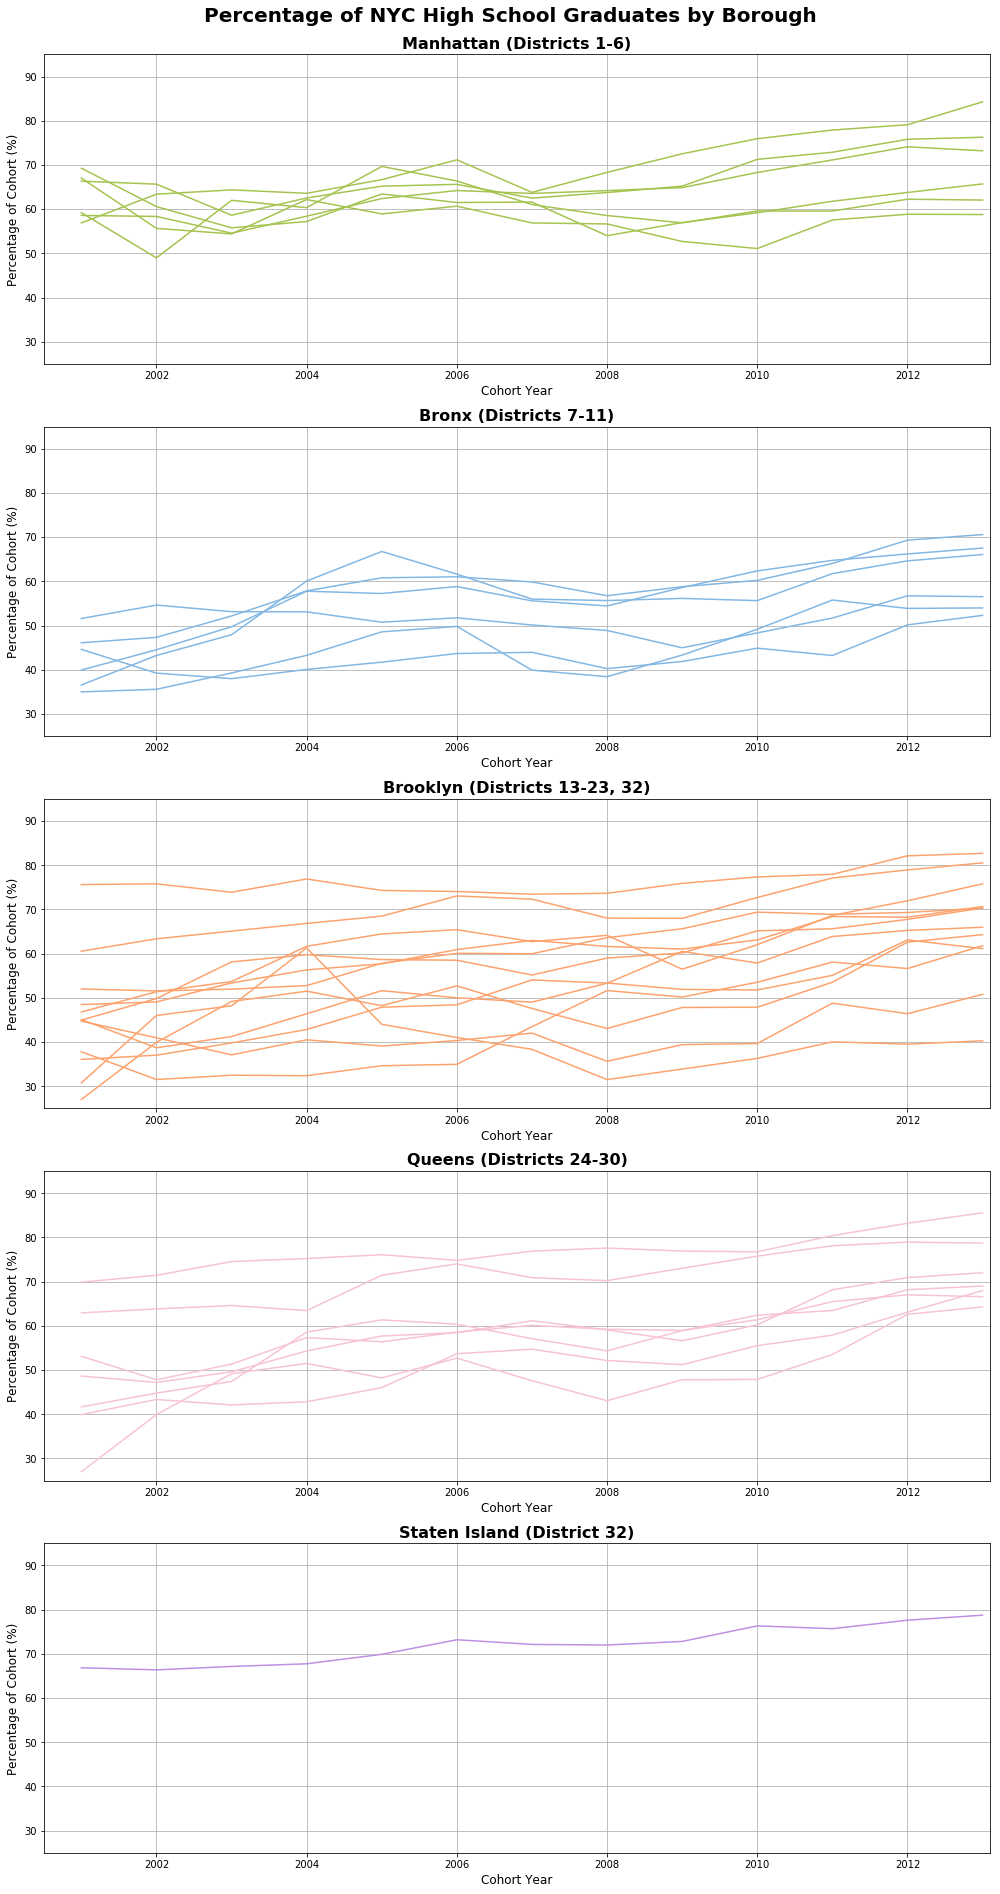

In [361]:
fix, ax = plt.subplots(nrows=5, figsize = (14,26), sharey=True, sharex=True)
fig = gcf()
fig.suptitle('Percentage of NYC High School Graduates by Borough', x=.51, y = 1.01, fontsize=20, fontweight='bold', ha='center')

#Plotting Manhattan districts
for var in range(1,6):
    ax[0].plot(grad_rate_district.get_group(var)["Cohort Year"],grad_rate_district.get_group(var)["% of cohort"],
           color = '#a5c34f')
ax[0].plot(grad_rate_district.get_group(6)["Cohort Year"],grad_rate_district.get_group(6)["% of cohort"],
       color = '#a5c34f',
       label = "Manhattan")
ax[0].set_title("Manhattan (Districts 1-6)",fontsize=16, fontweight="bold")


#Plotting Bronx districts
for var in range(7,12):
    ax[1].plot(grad_rate_district.get_group(var)["Cohort Year"],grad_rate_district.get_group(var)["% of cohort"],
           color = '#82b7e3',)
ax[1].plot(grad_rate_district.get_group(12)["Cohort Year"],grad_rate_district.get_group(12)["% of cohort"],
       color = '#82b7e3',
       label = "Bronx")
ax[1].set_title("Bronx (Districts 7-11)",fontsize=16, fontweight="bold")


#Plotting Brooklyn districts
for var in range(13,24):
    ax[2].plot(grad_rate_district.get_group(var)["Cohort Year"],grad_rate_district.get_group(var)["% of cohort"],
           color = '#fda26d',
           label = "Brooklyn")
ax[2].plot(grad_rate_district.get_group(32)["Cohort Year"],grad_rate_district.get_group(32)["% of cohort"],
       color = '#fda26d',
       label = "Brooklyn")
ax[2].set_title("Brooklyn (Districts 13-23, 32)", fontsize=16, fontweight="bold")

#Plotting Queens districts
for var in range(24,30):
    ax[3].plot(grad_rate_district.get_group(var)["Cohort Year"],grad_rate_district.get_group(var)["% of cohort"],
           color = '#f7c3d2',)
ax[3].plot(grad_rate_district.get_group(30)["Cohort Year"],grad_rate_district.get_group(32)["% of cohort"],
       color = '#f7c3d2',
       label = "Queens")
ax[3].set_title("Queens (Districts 24-30)", fontsize=16, fontweight="bold")

#Plotting Staten Island districts
ax[4].plot(grad_rate_district.get_group(31)["Cohort Year"],grad_rate_district.get_group(31)["% of cohort"],
       color = '#be8fe2',
       label = 'Staten Island')
ax[4].set_title("Staten Island (District 32)",fontsize=16, fontweight="bold")



for xxx in ax:
    xxx.set_ylabel("Percentage of Cohort (%)", fontsize = 12)
    xxx.set_xlabel("Cohort Year", fontsize = 12)
    xxx.grid()
#     xxx.spines['top'].set_visible(False)
#     xxx.spines['right'].set_visible(False)
#     xxx.spines['left'].set_visible(False)

    xxx.get_xaxis().tick_bottom()
    xxx.get_yaxis().tick_left()
    xxx.set_xlim(2000.5, 2013.1)
    xxx.set_ylim(25, 95)




# plt.xticks(range(2001, 2014, 1), fontsize=12)
# plt.yticks(range(25, 95, 5), fontsize=12)
# plt.grid(True, axis ='y', ls='--', lw=.5, c='k', alpha=.5)
# plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='on', left='off', right='off', labelleft='on')
# plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

### 3.2 Crime Data
#### 3.2.1 Plot of Crime Data

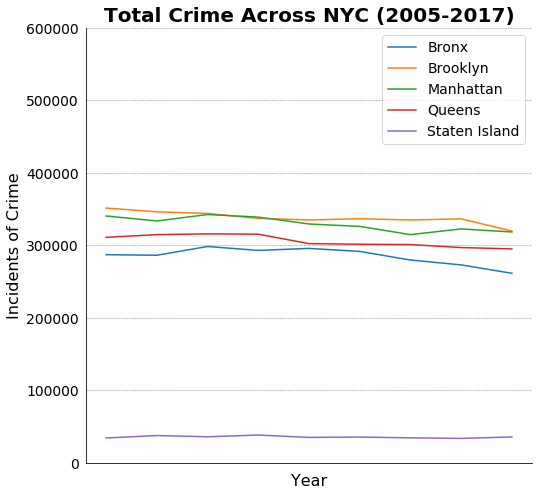

In [362]:
ax = total_crime.plot(figsize=(8,8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.yticks(range(0, 700000, 100000), fontsize=14)
plt.xticks(fontsize = 14, rotation = 0)

plt.grid(True, axis ='y', ls='--', lw=.5, c='k', alpha=.5)

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

ax.set_ylabel("Incidents of Crime", fontsize = 16)
ax.set_xlabel("Year", fontsize = 16)

plt.title("Total Crime Across NYC (2005-2017)", fontsize = 20, fontweight = "bold")

plt.legend(loc = "upper right", fontsize = 14)
plt.tight_layout
plt.show()

#### 3.2.2 Mapping of Crime Across NYC
We will now create a mapping of crime across the city.

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


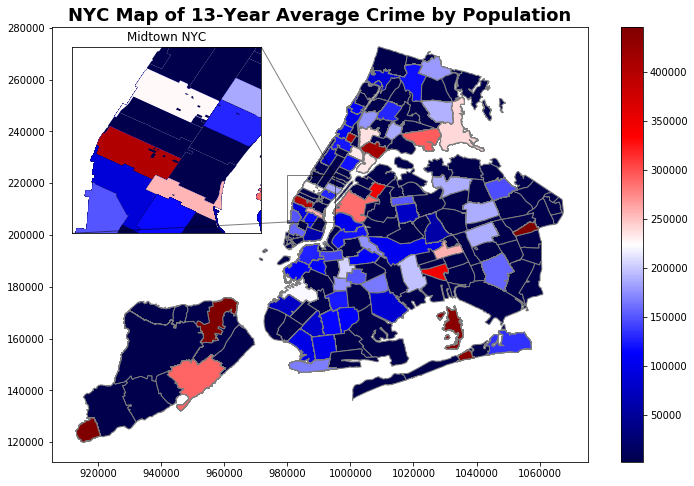

In [363]:
fig , ax = plt.subplots(nrows=1, ncols= 1, figsize = (12,8))
nyc_crime.set_index("ACP_Scaled")
nyc_crime.plot(ax=ax, edgecolor="tab:grey", column="ACP_Scaled", cmap="seismic", vmin=2000, vmax=446227, alpha=1, legend=True)
#nyc_crime.plot(ax=ax, edgecolor="tab:grey", column="POPULATION", cmap="OrRd", vmin=2000, vmax=446227, alpha=1, legend=True)


ax.set_title("NYC Map of 13-Year Average Crime by Population", fontsize=18, fontweight="bold")
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)





axins = zoomed_inset_axes(ax, 4, loc=2, borderpad=2) 
nyc_crime.plot(ax = axins, column='ACP_Scaled', cmap='seismic',vmin=2000, vmax=446227, alpha=1)


x1, x2, y1, y2 = 980000, 995000, 205000, 223000
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.set_title("Midtown NYC")
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", alpha = .5)
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

plt.show()

This map of Average Crime Per Year for 13 years, standardized for population, gives another way to view crime spread across the city. The legend is based off the median average crime level; white areas are median crime level, red levels are above median, and blue levels are below median.

## 3.3 Analyzing Data

In [364]:
scatter = []
scatterx = []
scattery=[]
for var in total_crime.columns:
    for x in total_crime[var]:
        scatterx += [x]
    for y in total_edu[var]:
        scattery += [y]
        for y in total_edu[var]:
            scatter += [x] + [y]

correlation_matrix = pd.DataFrame({"x":scatterx, "y":scattery})
cor = correlation_matrix.corr()
cor


,x,y
x,1.00000,-0.53654
y,-0.53654,1.00000


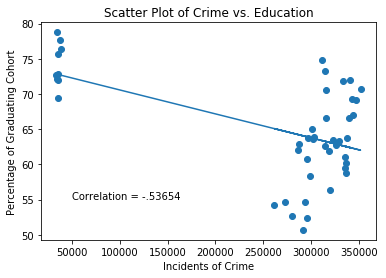

In [365]:
plt.scatter(scatterx, scattery)

m,b = np.polyfit(scatterx, scattery, 1)
plt.plot(scatterx, np.array(scatterx)*m + b)
#plt.plot(sort(scatterx), sort(scatterx)*[-.53654])
plt.text(50000, 55, "Correlation = -.53654")
plt.title("Scatter Plot of Crime vs. Education")
plt.xlabel("Incidents of Crime")
plt.ylabel("Percentage of Graduating Cohort")
plt.show()

The scatter plot shows a negative correlation between crime and educartion, implying that as crime increases, education decreases. However, the data seems to show evidence of heteroskedasticity, which implies that a simple linear regression may not be an apporpriate fit for the data. 

# 4. Conclusion

### Conclusion

After analyzing the earlier visualizations of crime and education, we observe that between 2005 and 2017, New York City has experienced an increase in high school graduation levels (as a % of cohort) and a decrease in incidents of crime. 

When we look deeper and disaggregate the education and crime data by boroughs, we make the following key observations: 
+ Staten Island has the highest graduation levels (as % of cohort) and the lowest incidents of crime across the 5 boroughs. 
+ The Bronx has the lowest graduation levels (as % of cohort), yet it does not have highest incidents of crime. 

When examining crime rates geospatially, zipcode areas (shown by red areas) with relatively high incidents of crime do not necessarily correspond with total crime rates by borough. For example, 2 of the 7 zipcode areas with higher crime rates are in Staten Island, which has the lowest  incidents of crime. From this, we can also see that the majority of NYC zipcode areas have relatively low incidents of crime compared to the median. 

From the scatter plot, we can establish that there is a negative correlation (r = -0.53654) between graduation levels and incidents of crime. While we cannot conclusively establish the causal nature of these two variables, we can conclude that in New York City, as graduation levels increase, incidents of crime tend to decrease. 